In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_test = "/content/drive/MyDrive/Image Classification Data/Images/Pet_Breeds"
category = ['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund', 'german shepherd', 'golden retriever']

In [ ]:
training = []
def createTrainingData():
    for cate in category:
        path = os.path.join(path_test, cate)
        class_num = category.index(cate)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (200, 200))
            training.append([new_array, class_num])
createTrainingData()

In [ ]:
training = np.array(training)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
np.unique(training[0][0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# plt.imshow(training[5][0])
# plt.show()

In [ ]:
X = []
y = []
for features, label in training:
    X.append(features)
    y.append(label)

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
X = np.array(X).reshape(-1, 200, 200, 3)

In [ ]:
X = X.astype('float32')
X = X/255

In [ ]:
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 10)
print(Y[100])
print(Y.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1700, 10)


In [ ]:
type(Y)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=None)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1139, 200, 200, 3), (1139, 10), (561, 200, 200, 3), (561, 10))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

In [ ]:
model = Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),
 

    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),


    Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),

    
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),

    Conv2D(64, (2,2), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),
    
    Conv2D(128, (2,2), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),
    
    Dropout(0.3),
    Flatten(),
    Dense(4, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 200, 200, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 128)    0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 100, 100, 128)    512       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 64)      73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                      

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
36/36 [==============================] - 4s 123ms/step - loss: 1.9715 - accuracy: 0.2757 - val_loss: 2.2028 - val_accuracy: 0.2299
Epoch 2/1000
36/36 [==============================] - 4s 118ms/step - loss: 1.9642 - accuracy: 0.2722 - val_loss: 2.1780 - val_accuracy: 0.2353
Epoch 3/1000
36/36 [==============================] - 4s 120ms/step - loss: 1.9369 - accuracy: 0.2959 - val_loss: 2.1912 - val_accuracy: 0.2299
Epoch 4/1000
36/36 [==============================] - 4s 121ms/step - loss: 1.9197 - accuracy: 0.2985 - val_loss: 2.1926 - val_accuracy: 0.2139
Epoch 5/1000
36/36 [==============================] - 4s 119ms/step - loss: 1.8953 - accuracy: 0.3011 - val_loss: 2.1770 - val_accuracy: 0.2371
Epoch 6/1000
36/36 [==============================] - 4s 118ms/step - loss: 1.9264 - accuracy: 0.2634 - val_loss: 2.2072 - val_accuracy: 0.2157
Epoch 7/1000
36/36 [==============================] - 4s 118ms/step - loss: 1.8807 - accuracy: 0.2932 - val_loss: 2.2033 - val_accuracy:

KeyboardInterrupt: ignored

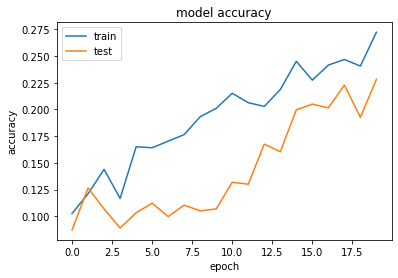

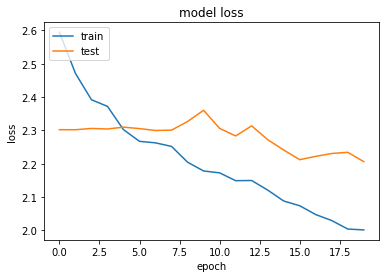

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
prediction = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Convert both into same format
yt = []
pred = []
for i in y_test:
    yt.append(np.argmax(i))
#     pred.append(np.argmax(j))

for i in prediction:
    pred.append(np.argmax(i))


In [ ]:
print(classification_report(yt, pred))

In [ ]:
|